<a href="https://colab.research.google.com/github/jayant2014/kaggle-titanic-survive-prediction/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
train_path = "/content/drive/My Drive/data/train.csv"
test_path = "/content/drive/My Drive/data/test.csv"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


main_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
main_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Check columns informations
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
# Create a train set descriptors and result

#Assumes that the PassengerID,name,ticket,cabin,and embarked do not matter
#Assumes that Fare is correlated to pclass
X = main_df.drop(['PassengerId','Survived','Name','Ticket','Cabin','Embarked','Fare'],axis=1)
Xtest = test_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis=1)
y = main_df['Survived']

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


**Data Preprocessing**

In [11]:
X.shape

(891, 5)

In [12]:
X.describe()

,Pclass,Age,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594
std,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,38.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000


In [13]:
#notice that the count of age is below than 714, indicate that there are empty values
#What are the empty values in each column of X
X.apply(lambda x: sum(x.isnull()),axis=0)

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
dtype: int64

In [0]:
#Refill empty values with Mean
X['Age'].fillna(main_df['Age'].mean(), inplace=True)
Xtest['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [0]:
age_bins = [0, 2, 10, 17, 40, 65, 100]
age_group = [0,1,2,3,4,5]
X['Age']= pd.cut(X['Age'], age_bins, labels=age_group)
Xtest['Age']= pd.cut(Xtest['Age'], age_bins, labels=age_group)

In [0]:
#Map Sex to 0,1
X['Sex'] = X['Sex'].map({'male':0,'female':1})
Xtest['Sex'] = Xtest['Sex'].map({'male':0,'female':1})

In [20]:
#SibSp would only care if the person brings spouse or sibling
#Parch would only care if the person brings parent or children

X['SibSp'][X['SibSp']>0]=1
X['Parch'][X['Parch']>0]=1
Xtest['SibSp'][Xtest['SibSp']>0]=1
Xtest['Parch'][Xtest['Parch']>0]=1

X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ip

,Pclass,Sex,Age,SibSp,Parch
0,3,0,3,1,0
1,1,1,3,1,0
2,3,1,3,0,0
3,1,1,3,1,0
4,3,0,3,0,0


In [21]:
X.shape

(891, 5)

In [23]:
y.shape

(891,)

In [24]:
kidsorwoman = y[(X['Age']<3) | (X['Sex'] == 1)]
kidsorwoman.value_counts()
#From this result we know that kids or women are more likely to survive than die.

1    256
0    116
Name: Survived, dtype: int64

In [25]:
nosiblingorparent = y[X['SibSp']+ X['Parch']<1]
hassiblingorparent = y[X['SibSp']+ X['Parch']>=1]
print(nosiblingorparent.value_counts())
print('____________________')
print(hassiblingorparent.value_counts())

#From here we can see that the likelihood to survive is more if a person has anyone with him/her

0    374
1    163
Name: Survived, dtype: int64
____________________
1    179
0    175
Name: Survived, dtype: int64


**Training the Model**

In [0]:
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.tree import DecisionTreeClassifier

#splitting the train and test sets
X_train, X_test, y_train,y_test= model_selection.train_test_split(X,y,test_size=0.2)

**Decission Tree Model Train**

In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
pd.DataFrame(X_train,y_train).head()
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.8044692737430168


**Training Multiple Classifiers and Test Them**

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [36]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 77.0950%
Log Loss: 6.671355512239581
SVC
****Results****
Accuracy: 64.8045%
Log Loss: 0.44123533619595773
DecisionTreeClassifier
****Results****
Accuracy: 80.4469%
Log Loss: 2.60662888361786
RandomForestClassifier
****Results****
Accuracy: 81.5642%
Log Loss: 1.7390416912171947


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AdaBoostClassifier
****Results****
Accuracy: 79.3296%
Log Loss: 0.6817742248882107
GradientBoostingClassifier
****Results****
Accuracy: 81.0056%
Log Loss: 0.47235066432319
GaussianNB
****Results****
Accuracy: 77.6536%
Log Loss: 0.5442090852589286
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.0950%
Log Loss: 0.4891600765123001
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 78.7709%
Log Loss: 0.5138607373371162


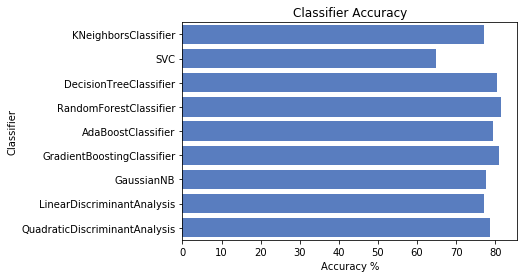

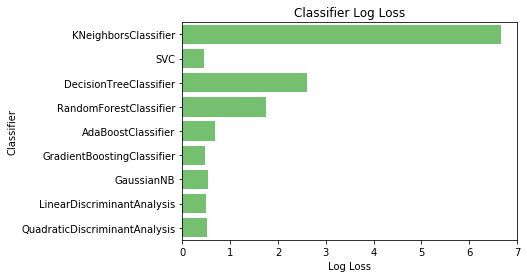

In [37]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [38]:
# Predict Test Set

favorite_clf = RandomForestClassifier()
favorite_clf.fit(X_train, y_train)
y_pred = pd.DataFrame(favorite_clf.predict(Xtest))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
# Tidy and Export Submission
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"]    
    })
submission['Survived'] = y_pred

submission.to_csv('submission.csv', index = False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [41]:
submission.shape

(418, 2)